<h1>MAP Stellar - Exploratory Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'pandas'

<h2>Data source: CSV</h2>

<h3>Ledgers</h3>

In [123]:
df_ledgers = pd.read_csv('visualization-data/ledgers-54135616-to-recent.csv') 

<h3>Transactions</h3>

In [124]:
df_transactions = pd.read_csv('visualization-data/transactions-54135616-to-54150000.csv') 

<h2>Cleaning</h2>

<h3>Date formatting from string</h3>

In [125]:
df_ledgers['created_at'] = pd.to_datetime(df_ledgers['created_at'])

df_ledgers['closed_at'] = pd.to_datetime(df_ledgers['closed_at'], format='%Y-%m-%d %H:%M:%S')

df_ledgers['created_at'] = df_ledgers['created_at'].dt.tz_localize('UTC')
df_ledgers['closed_at'] = df_ledgers['closed_at'].dt.tz_localize('UTC')

<h2>Visualizations</h2>

<h4>Number of accounts created per month</h4>

### Daily transactions

In [126]:
df_ledgers['date'] = df_ledgers['closed_at'].dt.date
daily_transactions = df_ledgers.groupby('date').size().reset_index(name='transaction_count')

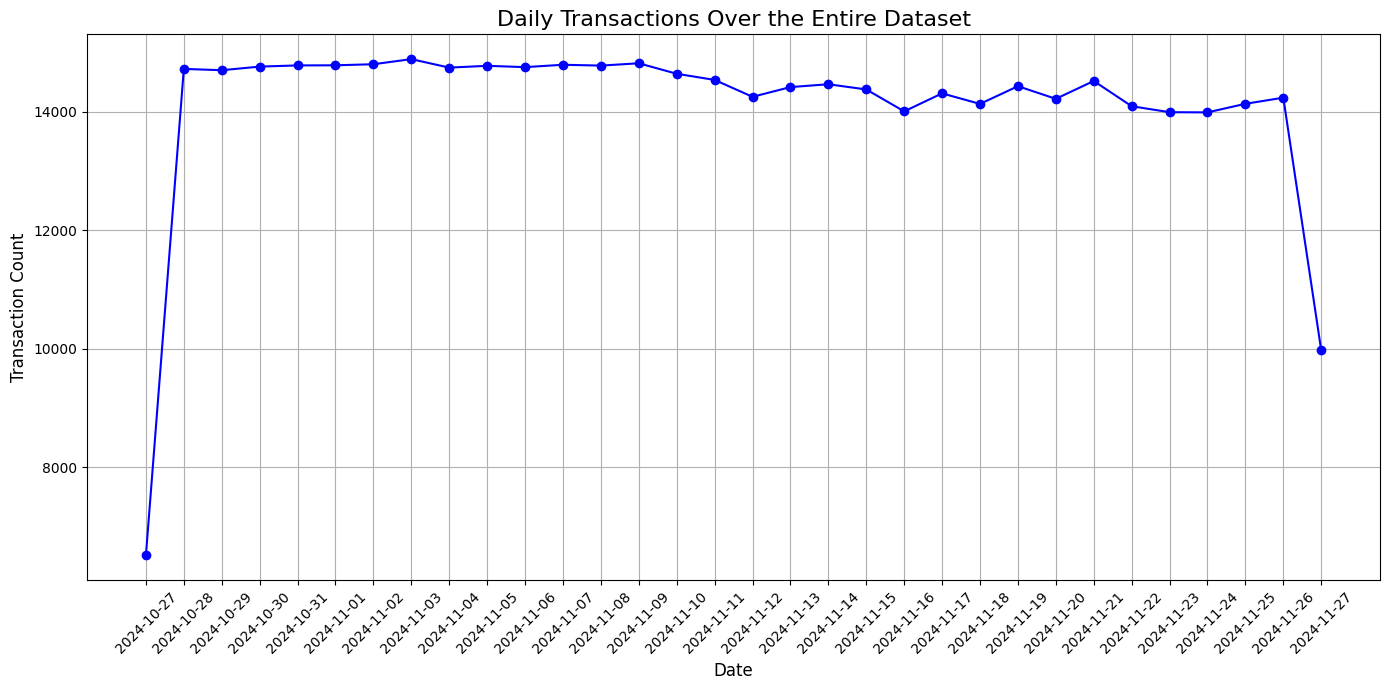

In [127]:
plt.figure(figsize=(14, 7))
plt.plot(daily_transactions['date'], daily_transactions['transaction_count'], marker='o', color='blue')
plt.title('Daily Transactions Over the Entire Dataset', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.grid()
plt.xticks(ticks=daily_transactions['date'], labels=daily_transactions['date'], rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### Total vs Successful vs failed transactions

In [129]:
# 7 day 7-day rolling average

df_ledgers['date'] = df_ledgers['closed_at'].dt.date
daily_data = df_ledgers.groupby('date')[['successful_transaction_count', 'failed_transaction_count']].sum()
daily_data['successful_rolling'] = daily_data['successful_transaction_count'].rolling(7).mean()
daily_data['failed_rolling'] = daily_data['failed_transaction_count'].rolling(7).mean()

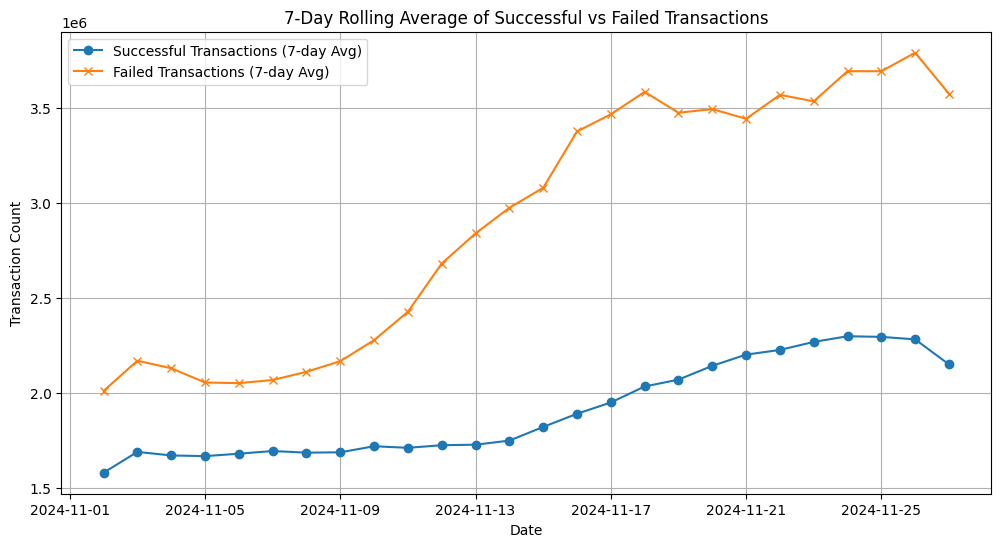

In [130]:

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['successful_rolling'], label='Successful Transactions (7-day Avg)', marker='o')
plt.plot(daily_data.index, daily_data['failed_rolling'], label='Failed Transactions (7-day Avg)', marker='x')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('7-Day Rolling Average of Successful vs Failed Transactions')
plt.legend()
plt.grid()
plt.show()


daily count of successful transactions and failed transactions over the dataset 

In [131]:
df_ledgers['date'] = df_ledgers['closed_at'].dt.date
daily_data = df_ledgers.groupby('date')[['successful_transaction_count', 'failed_transaction_count']].sum()

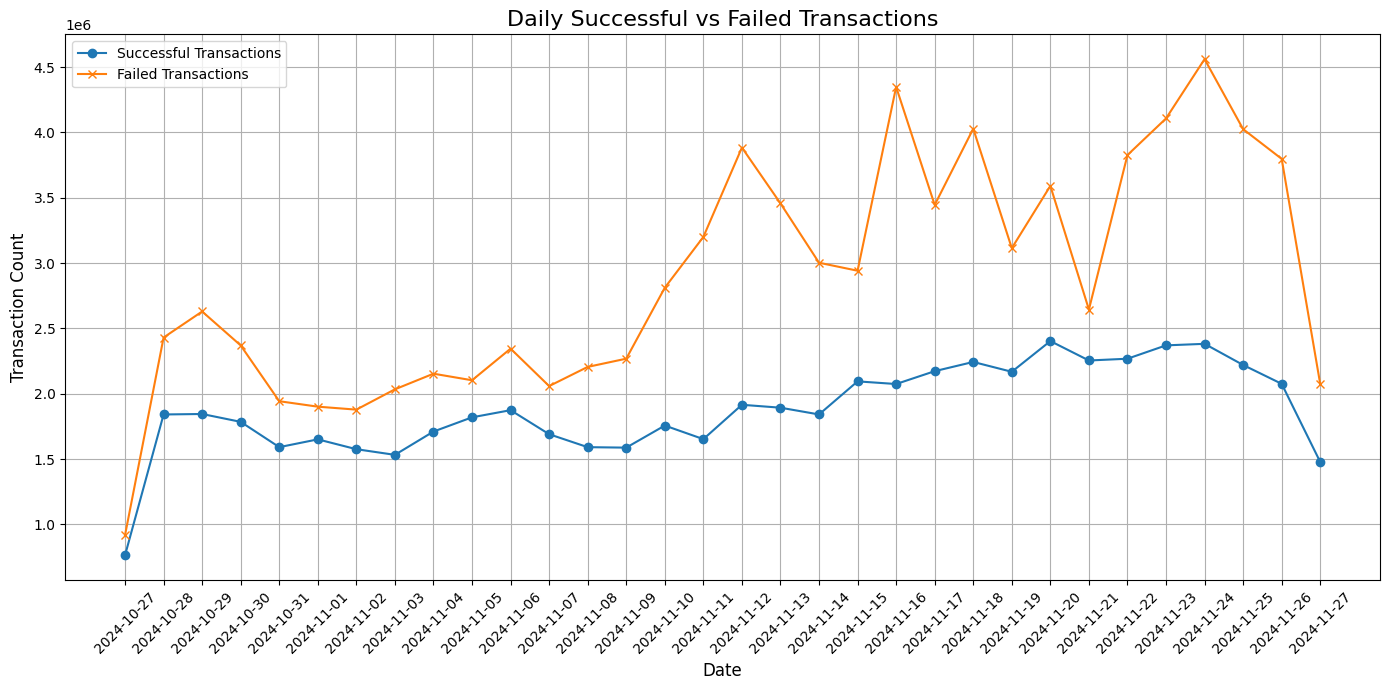

In [132]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['successful_transaction_count'], label='Successful Transactions', marker='o')
plt.plot(daily_data.index, daily_data['failed_transaction_count'], label='Failed Transactions', marker='x')
plt.xticks(ticks=daily_data.index, labels=daily_data.index, rotation=45, fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.title('Daily Successful vs Failed Transactions', fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [133]:
daily_transactions = df_ledgers.groupby('date').agg({
    'transaction_count': 'sum',
    'successful_transaction_count': 'sum',
    'failed_transaction_count': 'sum'
}).reset_index()


In [134]:
# Calculate total transactions explicitly
daily_transactions['total_transactions'] = (
    daily_transactions['successful_transaction_count'] + daily_transactions['failed_transaction_count']
)

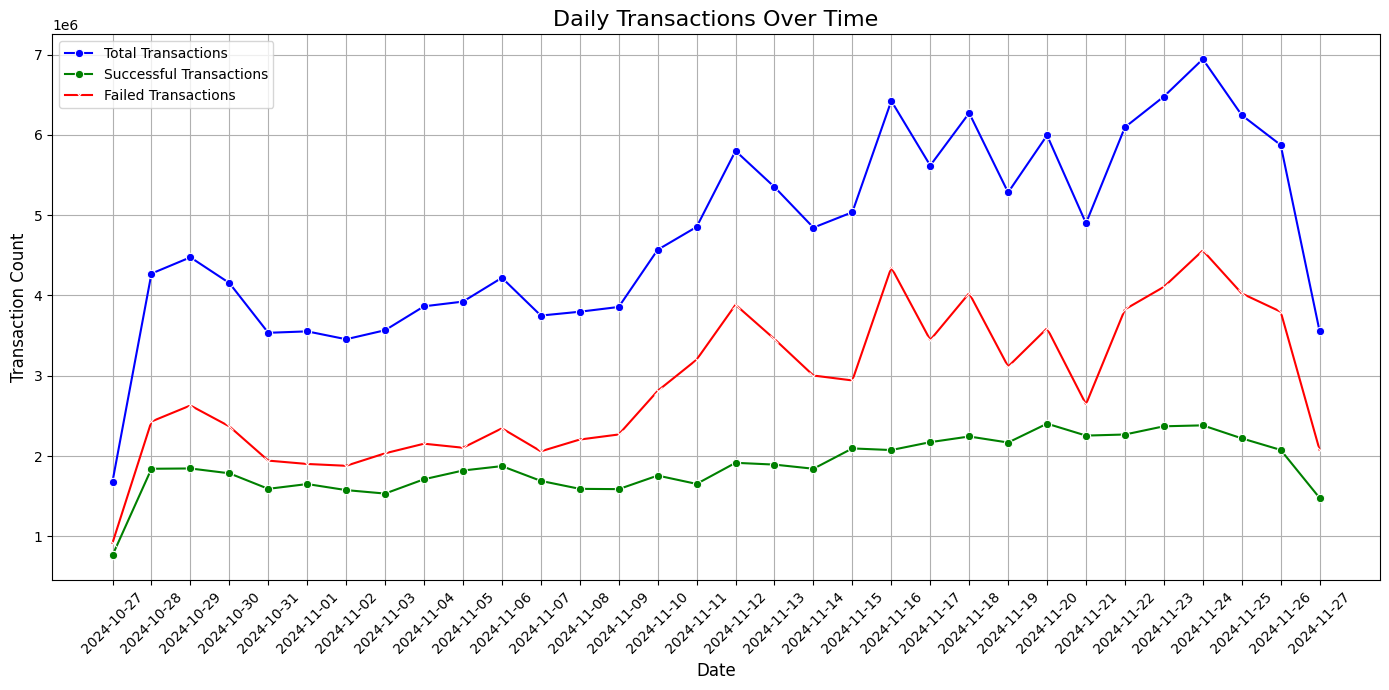

In [135]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='date', 
    y='total_transactions', 
    data=daily_transactions, 
    label='Total Transactions', 
    color='blue', 
    marker='o'
)
sns.lineplot(
    x='date', 
    y='successful_transaction_count', 
    data=daily_transactions, 
    label='Successful Transactions', 
    color='green', 
    marker='o'
)
sns.lineplot(
    x='date', 
    y='failed_transaction_count', 
    data=daily_transactions, 
    label='Failed Transactions', 
    color='red', 
    marker='x'
)

plt.xticks(ticks=daily_transactions['date'], labels=daily_transactions['date'], rotation=45, fontsize=10)
plt.title('Daily Transactions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()

plt.show()


In [136]:
aggregated_data = df_ledgers[['successful_transaction_count', 'failed_transaction_count']].sum()

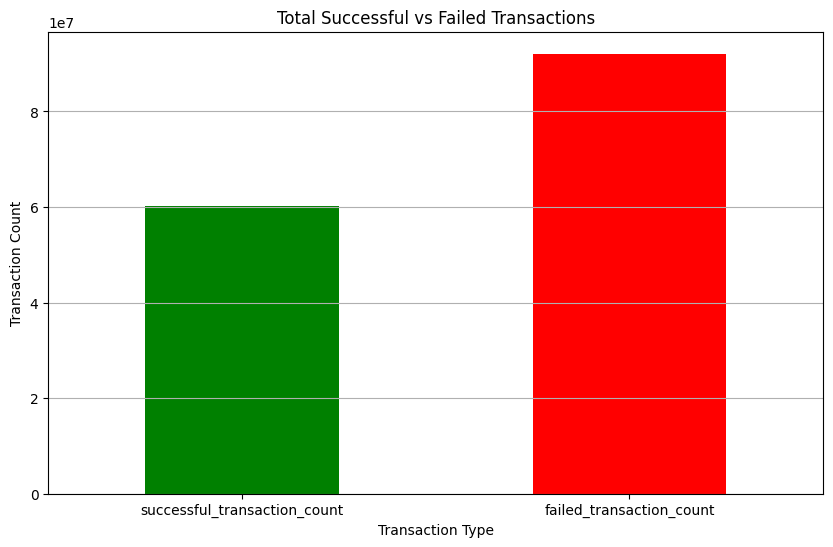

In [137]:
aggregated_data.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Total Successful vs Failed Transactions')
plt.ylabel('Transaction Count')
plt.xlabel('Transaction Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



per ledger 

### Histogram of inter-block finality time

In [140]:
df_ledgers = df_ledgers.sort_values(by='closed_at')
df_ledgers['finality_time'] = df_ledgers['closed_at'].diff().dt.total_seconds()
df_ledgers = df_ledgers.dropna(subset=['finality_time'])


min_time = df_ledgers['finality_time'].min()
max_time = df_ledgers['finality_time'].max()


bin_edges = np.arange(min_time, max_time + 1, 1)
x_ticks = np.arange(min_time, max_time + 1, 1) 

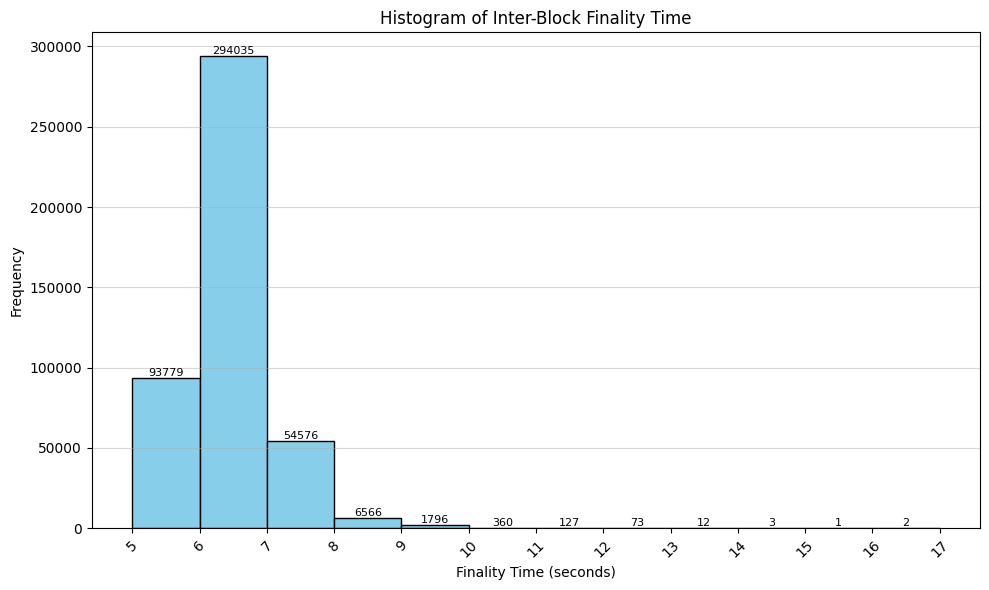

count    451330.000000
mean          5.960047
std           0.670175
min           5.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          17.000000
Name: finality_time, dtype: float64
Minimum finality time: 5.0
Maximum finality time: 17.0


In [141]:

# Plot histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_ledgers['finality_time'], bins=bin_edges, color='skyblue', edgecolor='black')

# Add frequency annotations
for count, bin_edge in zip(counts, bins):
    if count > 0:  # Only annotate bins with non-zero counts
        plt.text(bin_edge + 0.5, count, int(count), ha='center', va='bottom', fontsize=8)


plt.title('Histogram of Inter-Block Finality Time')
plt.xlabel('Finality Time (seconds)')
plt.ylabel('Frequency')


plt.xticks(x_ticks, rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


print(df_ledgers['finality_time'].describe())
print("Minimum finality time:", df_ledgers['finality_time'].min())
print("Maximum finality time:", df_ledgers['finality_time'].max())

What is the typical block finality time?\
From the histogram, the typical finality time is between 5 to 7 seconds, with the peak at 6 seconds.

#### Finality time for a weekday / weekend 

Filter for a specific day Monday 11.11.2024

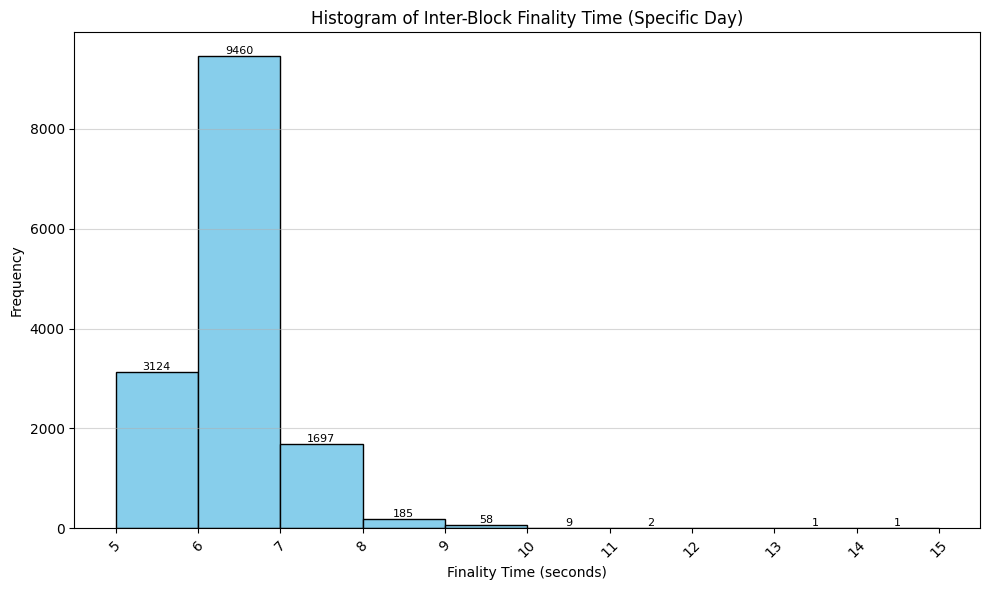

count    14537.000000
mean         5.943523
std          0.661497
min          5.000000
25%          6.000000
50%          6.000000
75%          6.000000
max         15.000000
Name: finality_time, dtype: float64
Minimum finality time: 5.0
Maximum finality time: 15.0


In [142]:
df_ledgers['date'] = df_ledgers['closed_at'].dt.date

# specific day Monday 11.11.2024
specific_day = df_ledgers[df_ledgers['date'] == pd.to_datetime('2024-11-11').date()]

min_time = specific_day['finality_time'].min()
max_time = specific_day['finality_time'].max()


bin_edges = np.arange(min_time, max_time + 1, 1) 
x_ticks = np.arange(min_time, max_time + 1, 1)  


plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(specific_day['finality_time'], bins=bin_edges, color='skyblue', edgecolor='black')

# Add frequency annotations
for count, bin_edge in zip(counts, bins):
    if count > 0:  # Only annotate bins with non-zero counts
        plt.text(bin_edge + 0.5, count, int(count), ha='center', va='bottom', fontsize=8)
        
plt.title('Histogram of Inter-Block Finality Time (Specific Day)')
plt.xlabel('Finality Time (seconds)')
plt.ylabel('Frequency')


plt.xticks(x_ticks, rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Display statistics
print(specific_day['finality_time'].describe())
print("Minimum finality time:", min_time)
print("Maximum finality time:", max_time)

Filter for a specific day Sunday 17.11.2024

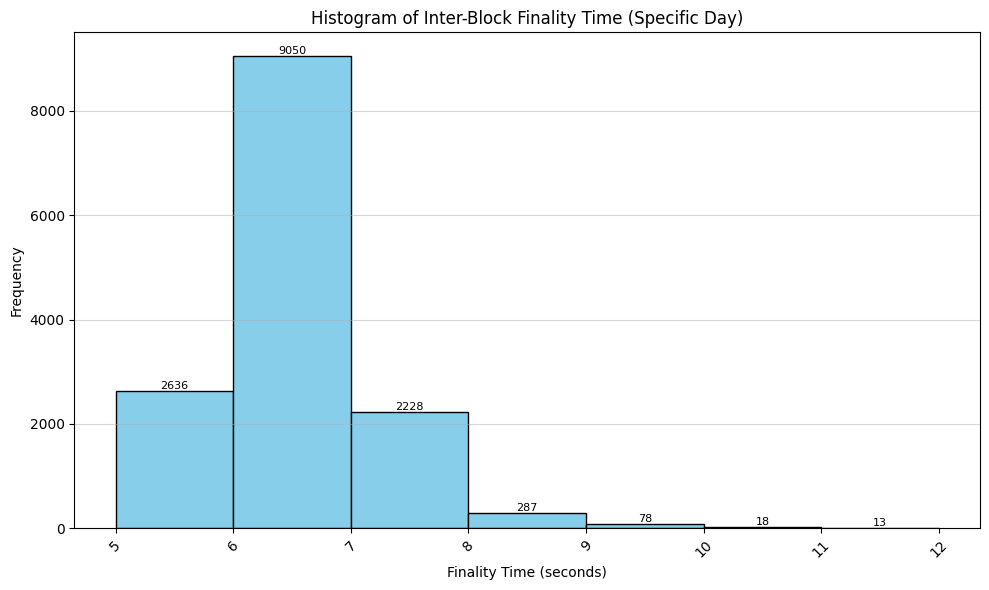

count    14310.000000
mean         6.037806
std          0.716729
min          5.000000
25%          6.000000
50%          6.000000
75%          6.000000
max         12.000000
Name: finality_time, dtype: float64
Minimum finality time: 5.0
Maximum finality time: 12.0


In [143]:

df_ledgers['date'] = df_ledgers['closed_at'].dt.date

# specific day Sunday 17.11.2024
specific_day = df_ledgers[df_ledgers['date'] == pd.to_datetime('2024-11-17').date()]

min_time = specific_day['finality_time'].min()
max_time = specific_day['finality_time'].max()


bin_edges = np.arange(min_time, max_time + 1, 1) 
x_ticks = np.arange(min_time, max_time + 1, 1)  


plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(specific_day['finality_time'], bins=bin_edges, color='skyblue', edgecolor='black')

# Add frequency annotations
for count, bin_edge in zip(counts, bins):
    if count > 0:  # Only annotate bins with non-zero counts
        plt.text(bin_edge + 0.5, count, int(count), ha='center', va='bottom', fontsize=8)

plt.title('Histogram of Inter-Block Finality Time (Specific Day)')
plt.xlabel('Finality Time (seconds)')
plt.ylabel('Frequency')


plt.xticks(x_ticks, rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Display statistics
print(specific_day['finality_time'].describe())
print("Minimum finality time:", min_time)
print("Maximum finality time:", max_time)

### Average inter block time in a day

In [144]:
df_ledgers['finality_time'] = df_ledgers['closed_at'].diff().dt.total_seconds()
df_ledgers['date'] = df_ledgers['closed_at'].dt.date

In [145]:
daily_avg_finality = df_ledgers.groupby('date')['finality_time'].mean().reset_index()
daily_avg_finality.columns = ['date', 'average_finality_time']

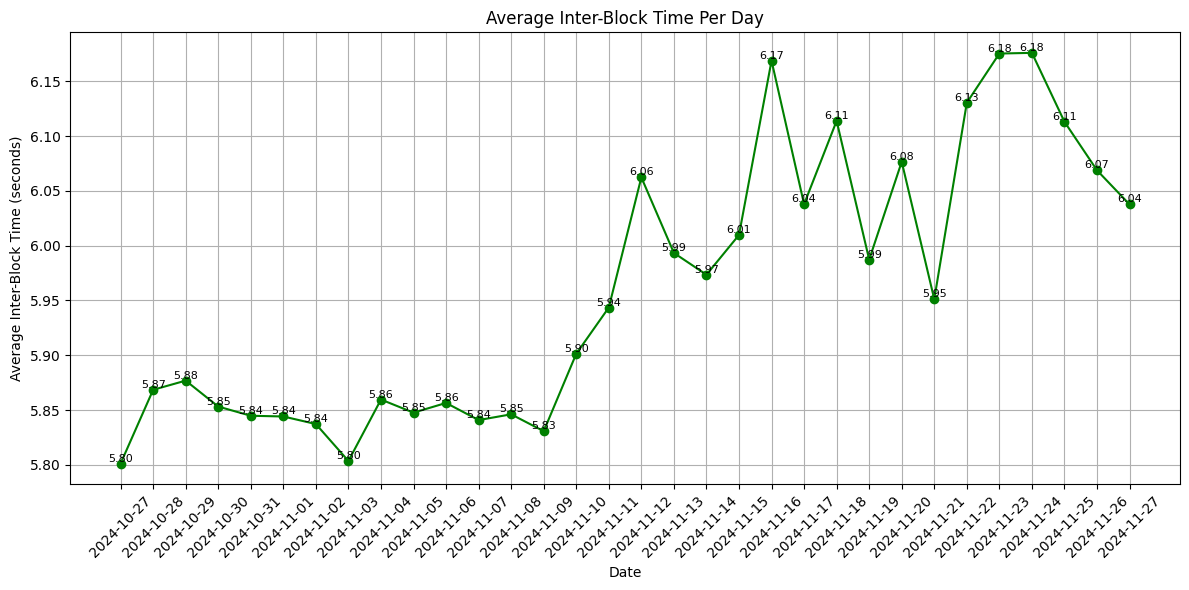

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_finality['date'], daily_avg_finality['average_finality_time'], marker='o', color='green')

# Add annotations for each point
for i, row in daily_avg_finality.iterrows():
    plt.text(row['date'], row['average_finality_time'], f"{row['average_finality_time']:.2f}", 
             ha='center', va='bottom', fontsize=8, color='black')


plt.title('Average Inter-Block Time Per Day')
plt.xlabel('Date')
plt.ylabel('Average Inter-Block Time (seconds)')
plt.xticks(ticks=daily_avg_finality['date'], labels=daily_avg_finality['date'], rotation=45, fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


In [147]:
print(daily_avg_finality)

          date  average_finality_time
0   2024-10-27               5.801137
1   2024-10-28               5.868437
2   2024-10-29               5.876811
3   2024-10-30               5.853136
4   2024-10-31               5.844744
5   2024-11-01               5.844088
6   2024-11-02               5.837184
7   2024-11-03               5.803466
8   2024-11-04               5.859546
9   2024-11-05               5.847580
10  2024-11-06               5.856436
11  2024-11-07               5.840803
12  2024-11-08               5.846065
13  2024-11-09               5.830679
14  2024-11-10               5.901305
15  2024-11-11               5.943523
16  2024-11-12               6.062307
17  2024-11-13               5.993341
18  2024-11-14               5.973451
19  2024-11-15               6.009738
20  2024-11-16               6.168785
21  2024-11-17               6.037806
22  2024-11-18               6.113855
23  2024-11-19               5.987250
24  2024-11-20               6.076523
25  2024-11-

### Number of operations over time

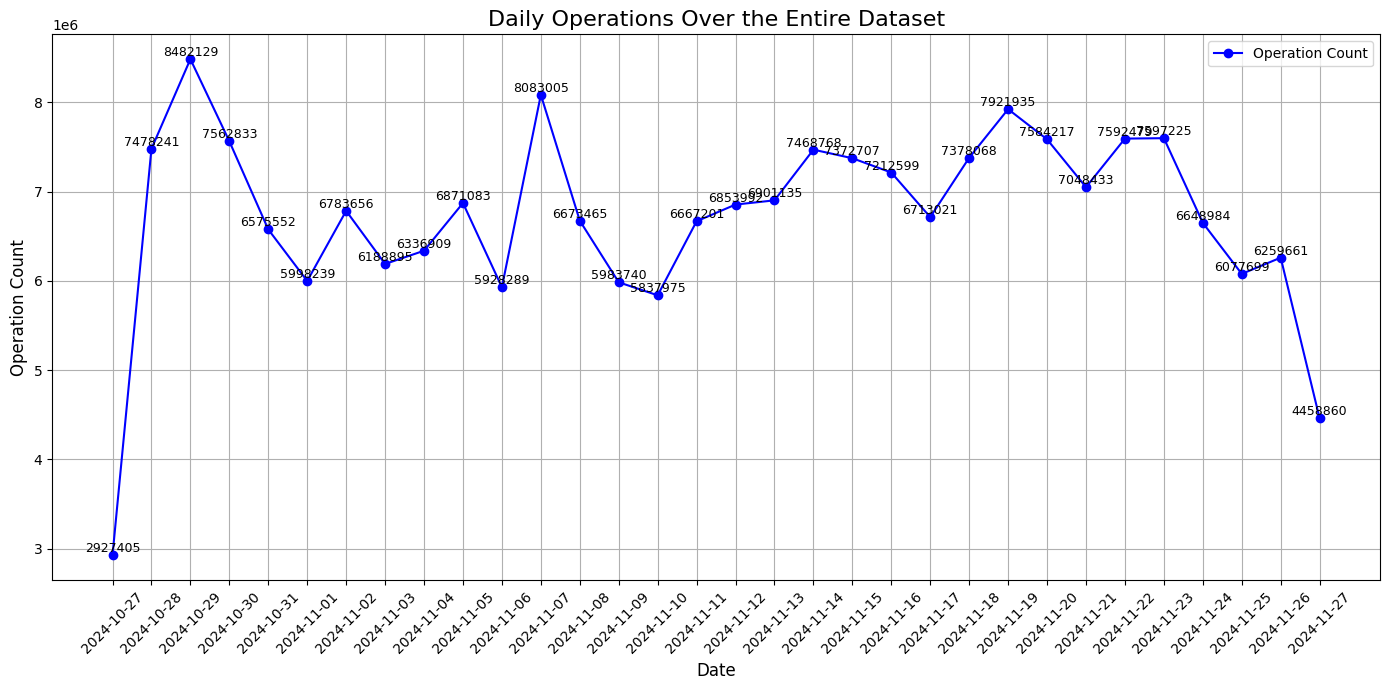

In [148]:
df_ledgers['date'] = df_ledgers['closed_at'].dt.date

# Group by date and sum the operations for each day
daily_operations = df_ledgers.groupby('date')['operation_count'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_operations['date'], daily_operations['operation_count'], marker='o', color='blue', label='Operation Count')

# Annotate each point with its value
for x, y in zip(daily_operations['date'], daily_operations['operation_count']):
    plt.text(x, y, str(y), fontsize=9, ha='center', va='bottom')  # Add y-values as annotations

plt.title('Daily Operations Over the Entire Dataset', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Operation Count', fontsize=12)
plt.grid()
plt.xticks(ticks=daily_operations['date'], labels=daily_operations['date'], rotation=45, fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()

plot in a log scale for Y

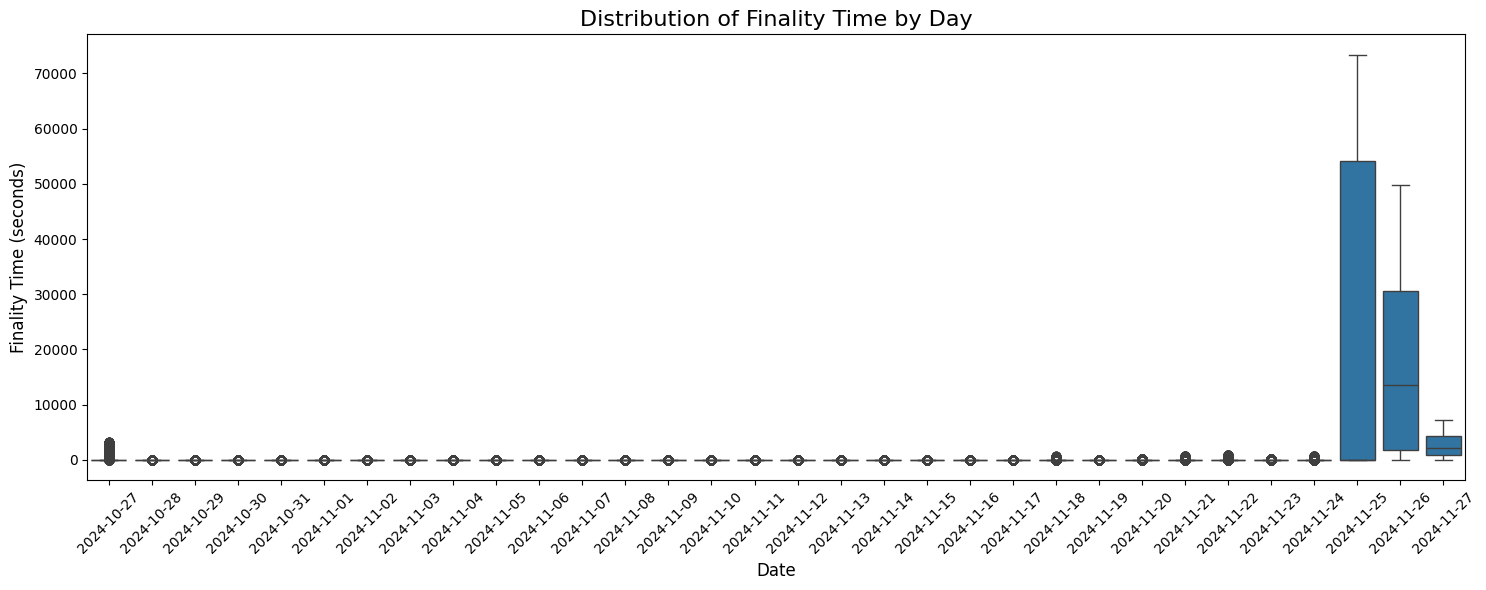

In [149]:
df_ledgers['finality_time'] = df_ledgers['created_at'] - df_ledgers['closed_at']
df_ledgers['finality_time_sec'] = df_ledgers['finality_time'].dt.total_seconds()

df_ledgers['date'] = df_ledgers['closed_at'].dt.date

plt.figure(figsize=(15, 6))
sns.boxplot(x='date', y='finality_time_sec', data=df_ledgers, showfliers=True)

plt.title('Distribution of Finality Time by Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Finality Time (seconds)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### y-axis to log scale

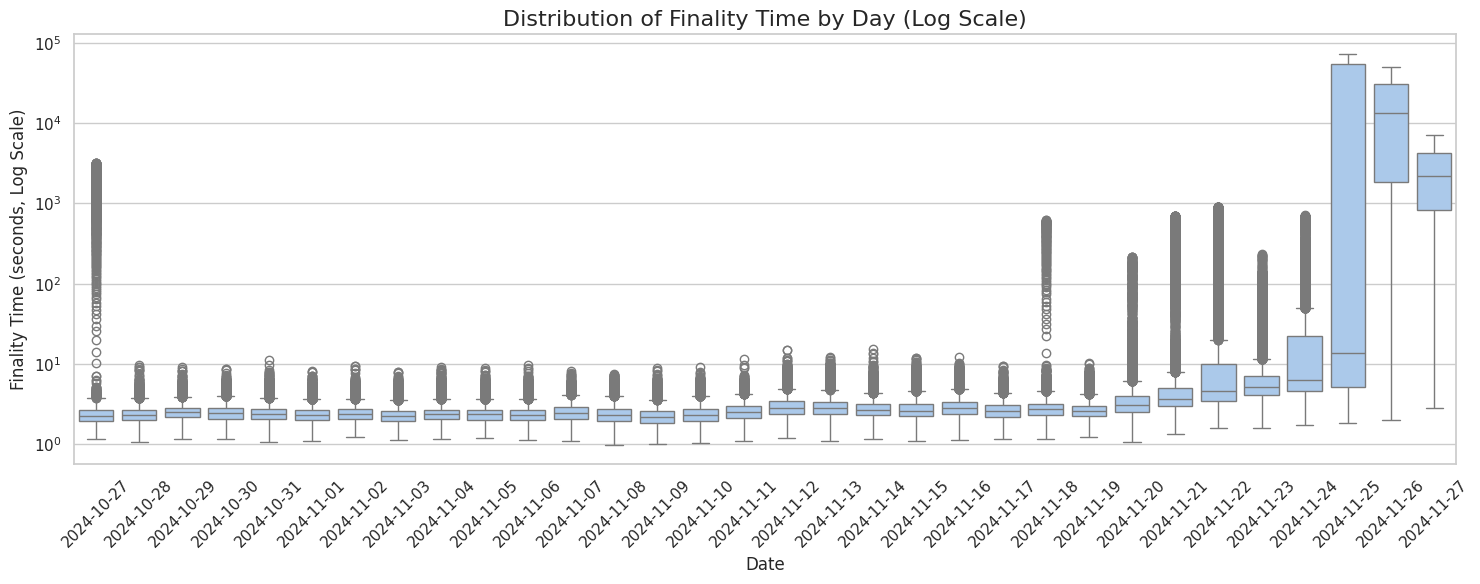

In [160]:
df_ledgers['finality_time'] = df_ledgers['created_at'] - df_ledgers['closed_at']
df_ledgers['finality_time_sec'] = df_ledgers['finality_time'].dt.total_seconds()

df_ledgers['date'] = df_ledgers['closed_at'].dt.date

plt.figure(figsize=(15, 6))
sns.boxplot(x='date', y='finality_time_sec', data=df_ledgers, showfliers=True)

plt.yscale('log') 

plt.title('Distribution of Finality Time by Day (Log Scale)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Finality Time (seconds, Log Scale)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### finality of time and number of transactions (incorrect?)

In [150]:
daily_data = df_ledgers.groupby('date').agg({
    'finality_time': 'mean', 
    'transaction_count': 'sum'
}).reset_index()
daily_data.columns = ['date', 'avg_finality_time', 'total_transactions']


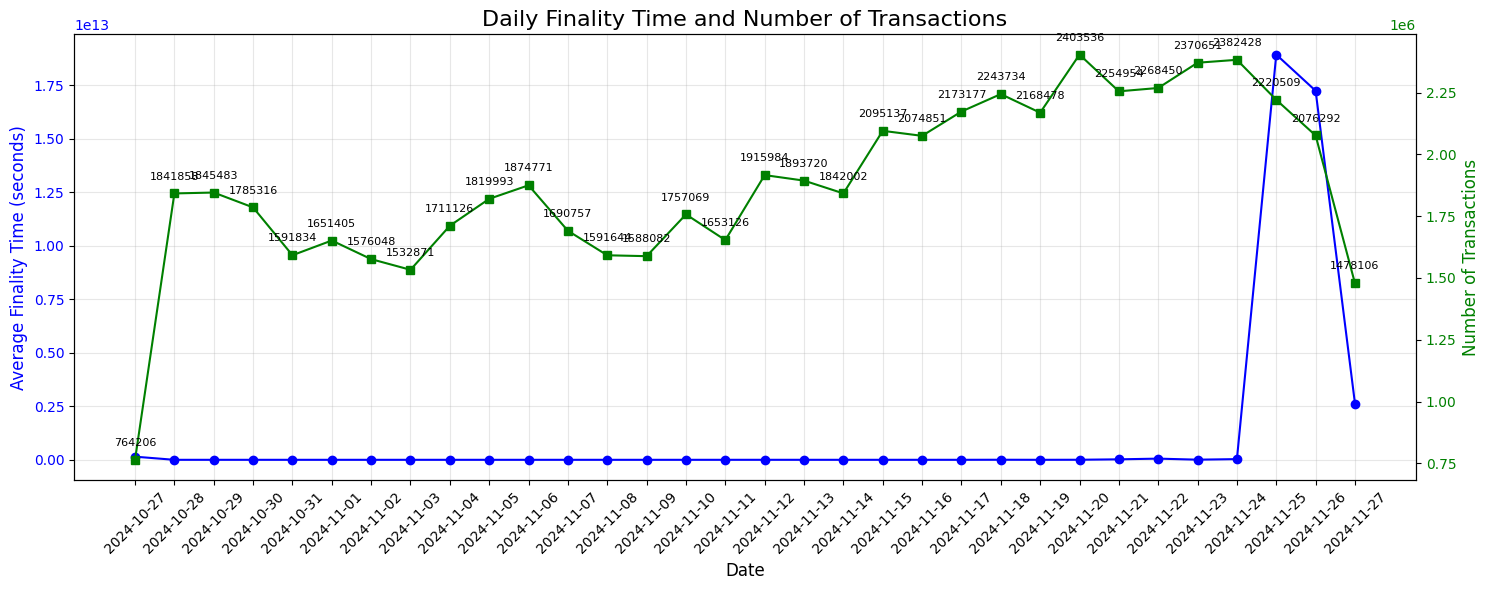

In [151]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(daily_data['date'], daily_data['avg_finality_time'], color='blue', marker='o', label='Finality Time')
ax1.set_ylabel('Average Finality Time (seconds)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['total_transactions'], color='green', marker='s', label='Total Transactions')
ax2.set_ylabel('Number of Transactions', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

for i, row in daily_data.iterrows():
    ax2.annotate(
        f"{int(row['total_transactions'])}",
        xy=(row['date'], row['total_transactions']),  
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=8,
        color='black',
        ha='center'
    )


ax1.set_xticks(daily_data['date'])
ax1.set_xticklabels(daily_data['date'], rotation=45, fontsize=10)

plt.title('Daily Finality Time and Number of Transactions', fontsize=16)
ax1.grid(alpha=0.3)
fig.tight_layout()
plt.show()


### finality of time and number of transactions 

In [152]:
df_ledgers = df_ledgers.sort_values('closed_at').dropna(subset=['closed_at'])

df_ledgers['finality_time'] = df_ledgers['closed_at'].diff().dt.total_seconds()

df_ledgers = df_ledgers.dropna(subset=['finality_time'])

df_ledgers['date'] = df_ledgers['closed_at'].dt.date

# Group by date and calculate daily averages
daily_data = df_ledgers.groupby('date').agg({
    'finality_time': 'mean',  # Average finality time for each day
    'transaction_count': 'sum'  # Total transactions for each day
}).reset_index()


daily_data.columns = ['date', 'avg_finality_time', 'total_transactions']

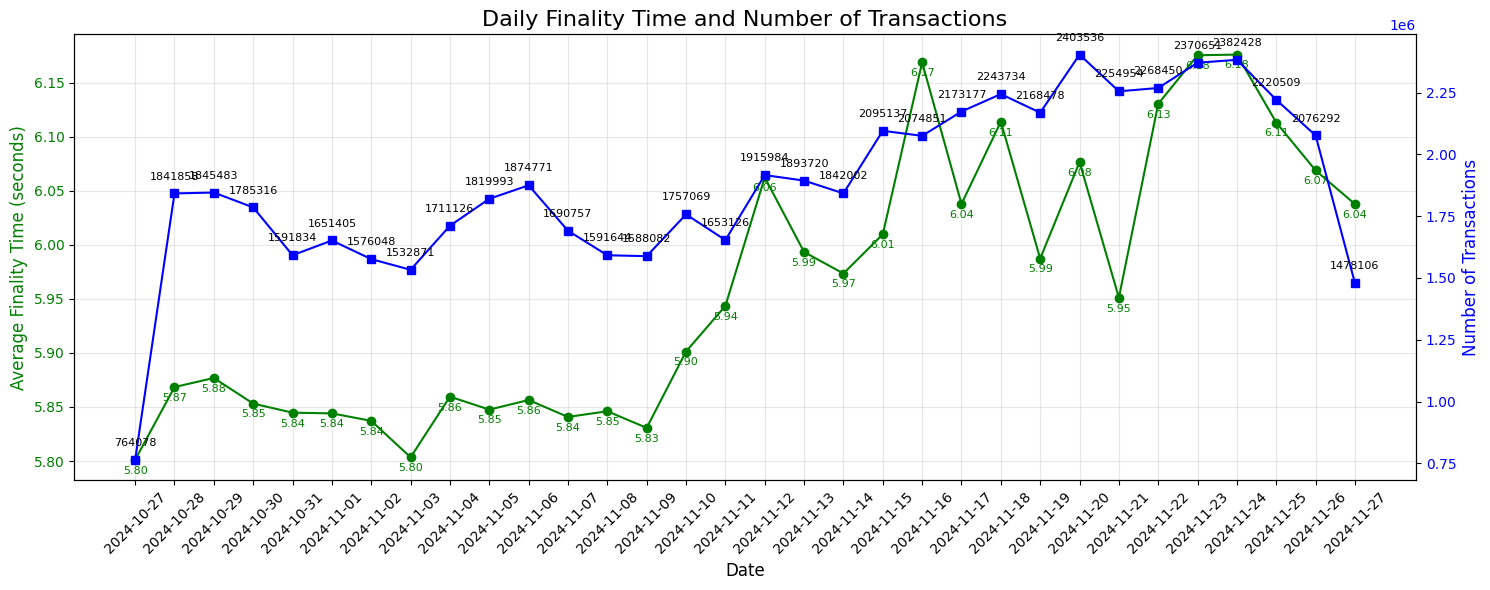

In [153]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(daily_data['date'], daily_data['avg_finality_time'], color='green', marker='o', label='Finality Time')
ax1.set_ylabel('Average Finality Time (seconds)', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Date', fontsize=12)

# Annotate average finality time
for i, row in daily_data.iterrows():
    ax1.annotate(
        f"{row['avg_finality_time']:.2f}",
        xy=(row['date'], row['avg_finality_time']),
        xytext=(0, -10),  # Position
        textcoords='offset points',
        fontsize=8,
        color='green',
        ha='center'
    )

# Plot total transactions on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['total_transactions'], color='blue', marker='s', label='Total Transactions')
ax2.set_ylabel('Number of Transactions', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Annotate total transactions
for i, row in daily_data.iterrows():
    ax2.annotate(
        f"{int(row['total_transactions'])}",
        xy=(row['date'], row['total_transactions']),  
        xytext=(0, 10),  # Position 
        textcoords='offset points',
        fontsize=8,
        color='black',
        ha='center'
    )

ax1.set_xticks(daily_data['date'])
ax1.set_xticklabels(daily_data['date'], rotation=45, fontsize=10)
plt.title('Daily Finality Time and Number of Transactions', fontsize=16)
ax1.grid(alpha=0.3)
fig.tight_layout()
plt.show()


#### Finality Time and Number of Operations (incorrect?)

In [154]:
# 
daily_data = df_ledgers.groupby('date').agg(
    avg_finality_time=('finality_time_sec', 'mean'),
    total_transactions=('transaction_count', 'sum'),  
    total_operations=('operation_count', 'sum')      
).reset_index()


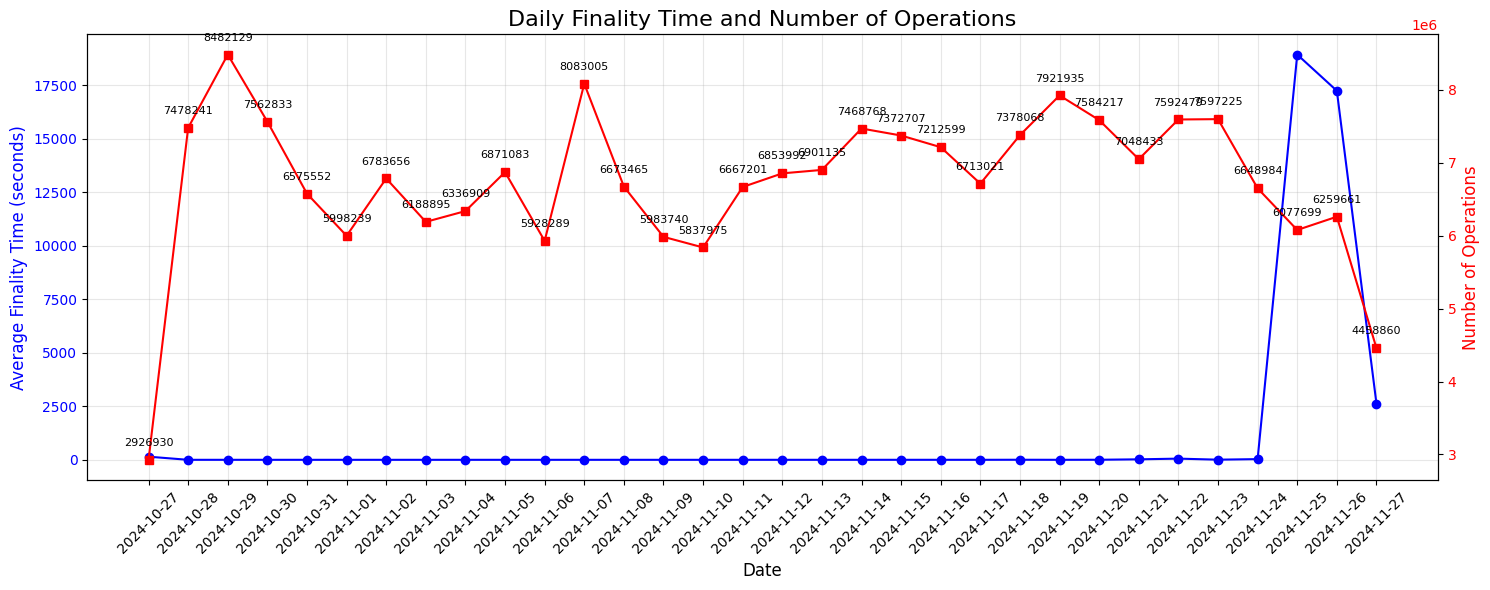

In [155]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(daily_data['date'], daily_data['avg_finality_time'], color='blue', marker='o', label='Finality Time')
ax1.set_ylabel('Average Finality Time (seconds)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date', fontsize=12)


ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['total_operations'], color='red', marker='s', label='Total Operations')
ax2.set_ylabel('Number of Operations', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add annotations for total operations
for i, row in daily_data.iterrows():
    ax2.annotate(
        f"{int(row['total_operations'])}", 
        xy=(row['date'], row['total_operations']),  
        xytext=(0, 10),  
        textcoords='offset points',
        fontsize=8,
        color='black',
        ha='center'
    )


ax1.set_xticks(daily_data['date'])
ax1.set_xticklabels(daily_data['date'], rotation=45, fontsize=10)
plt.title('Daily Finality Time and Number of Operations', fontsize=16)
ax1.grid(alpha=0.3)
fig.tight_layout()
plt.show()


### Finality Time and Number of Operations

In [156]:
daily_data = df_ledgers.groupby('date').agg(
    avg_finality_time=('finality_time', 'mean'), 
    total_transactions=('transaction_count', 'sum'),  
    total_operations=('operation_count', 'sum')      
).reset_index()


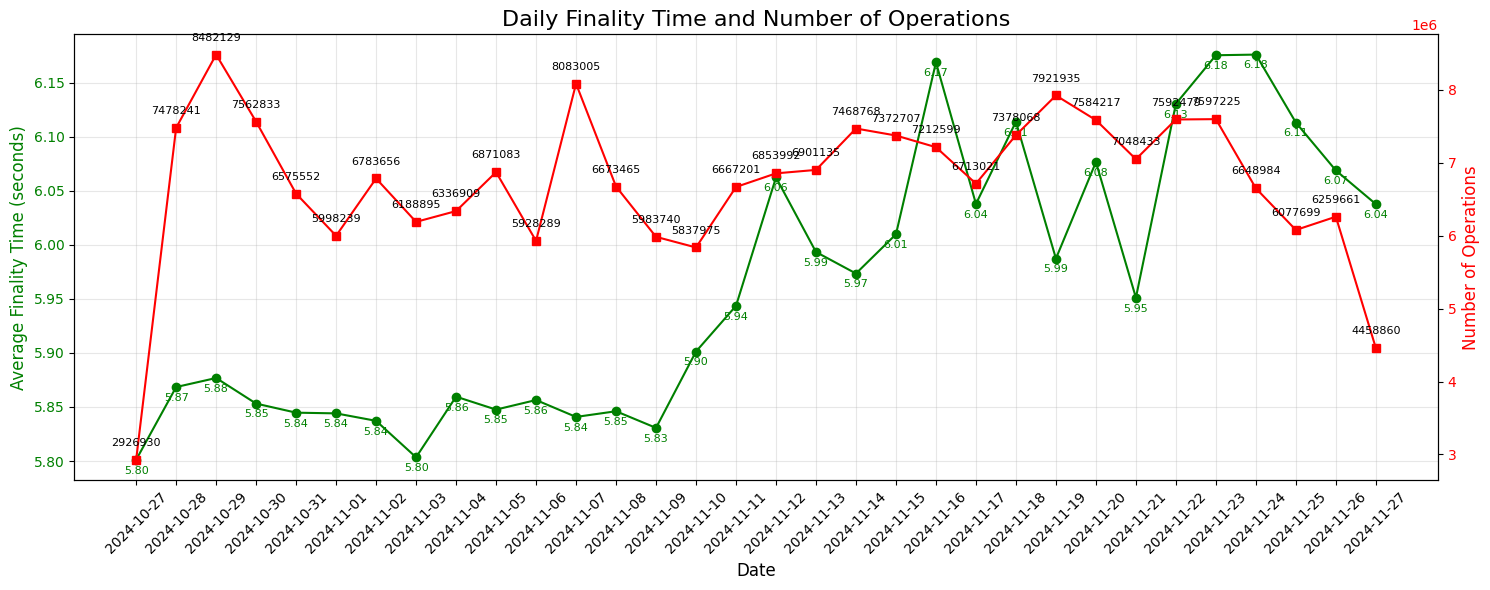

In [157]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot average finality time
ax1.plot(daily_data['date'], daily_data['avg_finality_time'], color='green', marker='o', label='Finality Time')
ax1.set_ylabel('Average Finality Time (seconds)', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Date', fontsize=12)

# Annotate average finality time
for i, row in daily_data.iterrows():
    ax1.annotate(
        f"{row['avg_finality_time']:.2f}",
        xy=(row['date'], row['avg_finality_time']),
        xytext=(0, -10),  # Position
        textcoords='offset points',
        fontsize=8,
        color='green',
        ha='center'
    )

# Plot total operations on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['total_operations'], color='red', marker='s', label='Total Operations')
ax2.set_ylabel('Number of Operations', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Annotate total operations
for i, row in daily_data.iterrows():
    ax2.annotate(
        f"{int(row['total_operations'])}", 
        xy=(row['date'], row['total_operations']),  
        xytext=(0, 10),  # Position
        textcoords='offset points',
        fontsize=8,
        color='black',
        ha='center'
    )

ax1.set_xticks(daily_data['date'])
ax1.set_xticklabels(daily_data['date'], rotation=45, fontsize=10)
plt.title('Daily Finality Time and Number of Operations', fontsize=16)
ax1.grid(alpha=0.3)
fig.tight_layout()
plt.show()

take these 3 days in more derails (operaions and transactions)

<h3>Number of validators over time</h3>

<h3>Quorum structure</h3>

<h4>API call to stellarbeat</h4>

<h4>Graph?</h4>